# Explore here

In [1]:
!pip install missingno lazypredict
!pip install statsmodels

  Using cached missingno-0.5.2-py3-none-any.whl.metadata (639 bytes)
  Using cached lazypredict-0.2.12-py2.py3-none-any.whl.metadata (12 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached tqdm-4.66.5-py3-none-any.whl.metadata (57 kB)
  Using cached lightgbm-4.5.0-py3-none-manylinux_2_28_x86_64.whl.metadata (17 kB)
Using cached missingno-0.5.2-py3-none-any.whl (8.7 kB)
Using cached lazypredict-0.2.12-py2.py3-none-any.whl (12 kB)
Using cached click-8.1.7-py3-none-any.whl (97 kB)
Using cached lightgbm-4.5.0-py3-none-manylinux_2_28_x86_64.whl (3.6 MB)
Using cached tqdm-4.66.5-py3-none-any.whl (78 kB)

[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
  Using cached statsmodels-0.14.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.2 kB)
  Using cached patsy-0.5.6-py2.py3-none-any.whl.metadata (3.5 kB)
Using cached statsmodels-0.14.2-cp312-cp312-manylinux_2_17_x86_64.manylinux201

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score


In [3]:
#1) Descargo los datos:

#a) Leo los datos de la URL.
url = "https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv"

#b) Guardo los datos en un DataFrame.
df = pd.read_csv(url, sep=',')

#c) Miro las primeras filas del DF.
print(df.head())

   fips  TOT_POP    0-9  0-9 y/o % of total pop  19-Oct  \
0  1001    55601   6787               12.206615    7637   
1  1003   218022  24757               11.355276   26913   
2  1005    24881   2732               10.980266    2960   
3  1007    22400   2456               10.964286    2596   
4  1009    57840   7095               12.266598    7570   

   10-19 y/o % of total pop  20-29  20-29 y/o % of total pop  30-39  \
0                 13.735364   6878                 12.370281   7089   
1                 12.344167  23579                 10.814964  25213   
2                 11.896628   3268                 13.134520   3201   
3                 11.589286   3029                 13.522321   3113   
4                 13.087828   6742                 11.656293   6884   

   30-39 y/o % of total pop  ...  COPD_number  diabetes_prevalence  \
0                 12.749771  ...         3644                 12.9   
1                 11.564429  ...        14692                 12.0   
2       

In [4]:
# Guardo el DataFrame.
df.to_csv('/workspace/Proyecto16_albaebauluz/data/raw/eeuu.csv', index=False)
#Configuro la biblioteca de Pandas en Python para controlar cómo se muestra el DF cuando los visualizo en un entorno interactivo (Jupyter Notebook). Nota: "None" sirve para que pandas muestre el total de las columnas aunque sean muchas. 
pd.set_option('display.max_columns', None)

df.head()
df.tail()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,5334,12.389956,5261,12.220390,4943,11.481731,2198,5.105572,949,2.204362,40397,93.835219,592,1.375113,665,1.544680,435,1.010429,68,0.157952,894,2.076607,43051,-496,660,12.6,7.0,5.6,1.4,-18.5,-17.2,2549,9433,10108,6243,9.0,33.3,35.7,22.0,3540,8.4,10.0,8.5,73315,67141,79489,21150,20254,896,4.2,73315,117.8,207.9,199.6,79.8,76.2,10.6,10.4,21.311749,11.997173,2.160982,9.836192,28.018244,40.537033,10,44527,7015,15.8,Sweetwater,Wyoming,56,37,31761,40.3,38.5,42.2,12796,33.6,32.1,35.1,10672,5.9,5.4,6.4,1862,6.6,5.7,7.7,2098,8.9,8.3,9.6,2834,2.6,2.4,2.8,821,5
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,3423,14.830380,2928,12.685759,2875,12.456133,1569,6.797799,657,2.846497,21971,95.190850,175,0.758199,211,0.914172,326,1.412417,35,0.151640,363,1.572722,23081,-180,270,9.9,3.2,6.7,1.6,-16.2,-14.5,958,2272,4087,9847,5.6,13.2,23.8,57.4,1443,6.3,6.7,5.9,99087,88142,110032,15340,14876,464,3.0,99087,159.2,207.9,199.6,79.8,76.2,10.6,10.4,11.425901,6.432063,1.158570,5.273493,15.021465,21.733183,6,22923,4298,18.7,Teton,Wyoming,56,39,18842,24.3,22.4,26.1,4576,19.4,18.1,20.8,3655,5.2,4.6,5.8,981,4.9,4.0,6.0,928,7.2,6.5,8.0,1360,2.4,2.2,2.6,447,5
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,2390,11.773979,2434,11.990738,2554,12.581901,1233,6.074191,507,2.497660,1935

In [5]:
# Tamaño de la muestra.
df.shape   

# Información de los datos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [6]:
# Compruebo se hay valores duplicados. 
df.duplicated().sum()

np.int64(0)

In [7]:
# Análisis descriptivo de la muestra.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fips,3140.0,30401.640764,15150.559265,1001.0,18180.500000,29178.000000,45081.50000,5.604500e+04
TOT_POP,3140.0,104189.412420,333583.395432,88.0,10963.250000,25800.500000,67913.00000,1.010552e+07
0-9,3140.0,12740.302866,41807.301846,0.0,1280.500000,3057.000000,8097.00000,1.208253e+06
0-9 y/o % of total pop,3140.0,11.871051,2.124081,0.0,10.594639,11.802727,12.95184,2.546068e+01
19-Oct,3140.0,13367.976752,42284.392134,0.0,1374.500000,3274.000000,8822.25000,1.239139e+06
...,...,...,...,...,...,...,...,...
CKD_prevalence,3140.0,3.446242,0.568059,1.8,3.100000,3.400000,3.80000,6.200000e+00
CKD_Lower 95% CI,3140.0,3.207516,0.527740,1.7,2.900000,3.200000,3.50000,5.800000e+00
CKD_Upper 95% CI,3140.0,3.710478,0.613069,1.9,3.300000,3.700000,4.10000,6.600000e+00
CKD_number,3140.0,2466.234076,7730.422067,3.0,314.750000,718.000000,1776.25000,2.377660e+05


In [8]:
# Identifico las columnas object para codificarlas.
object_columns = df.select_dtypes(include=['object']).columns

print(object_columns)


Index(['COUNTY_NAME', 'STATE_NAME'], dtype='object')


In [9]:
# Crear un diccionario para almacenar un LabelEncoder para cada columna categórica

le_dict = {}

# Identificar las columnas categóricas
categorical_cols = ["COUNTY_NAME", "STATE_NAME"]

# Aplicar LabelEncoder a cada columna categórica
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le  # Guardar el encoder en el diccionario

df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,7738,13.917016,5826,10.478229,4050,7.284042,2014,3.622237,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,80,0,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,29986,13.753658,29932,13.728890,20936,9.602701,9368,4.296814,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,87,0,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,3278,13.174712,3076,12.362847,2244,9.018930,10

In [10]:
# Renombro la variable dependiente (Active Primary Care Physicians per 100000 Population 2018 (AAMC))
df['target']=df['Active Primary Care Physicians per 100000 Population 2018 (AAMC)']
df=df.drop(columns=['Active Primary Care Physicians per 100000 Population 2018 (AAMC)'])

#df['Active Primary Care Physicians per 100000 Population 2018 (AAMC)']


In [11]:
# Separo las bd train y test
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [12]:
# Escalamos las expresiones de genes para que tengan una misma escala y contribución
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [13]:
# Regresión linear sin regularizar
m_lineal = LinearRegression().fit(X_train_sc, y_train)
y_pred_linear_train = m_lineal.predict(X_train_sc)
y_pred_linear_test = m_lineal.predict(X_test_sc)


In [14]:
def get_metrics(yhat, y_test, yhat_train, y_train):
  metrics_train = r2_score(y_train, yhat_train), median_absolute_error(y_train, yhat_train), mean_absolute_percentage_error(y_train, yhat_train)*100
  metrics_test = r2_score(y_test, yhat), median_absolute_error(y_test, yhat), mean_absolute_percentage_error(y_test, yhat)*100
  metrics_diff = list(map(lambda x: x[1]-x[0], zip(metrics_train, metrics_test)))
  return pd.DataFrame(data=[metrics_train, metrics_test, metrics_diff], columns=['R2', 'Median AE', 'MAPE'], index=['Train set', 'Test set', 'Diferencia'])

In [15]:
get_metrics(y_pred_linear_test, y_test, y_pred_linear_train, y_train)

,R2,Median AE,MAPE
Train set,0.997440,0.405327,0.528798
Test set,0.997275,0.416670,0.539030
Diferencia,-0.000165,0.011343,0.010232


Los resultados del modelo de regresión lineal muestran que no parece haber overfitting en los modelos de entrenamiento y prueba. Por otro lado, las diferencias obtenidas para las tres métricas son muy pequeñas, por lo que el modelo generaliza bien sobre los nuevos datos (test set). 

In [16]:
m_lasso = LassoCV(alphas=np.logspace(-6,6,10), cv=5, random_state=42, n_jobs=-1).fit(X_train_sc, y_train)

/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 351.2012973967814, tolerance: 33.03509590099504
  model = cd_fast.enet_coordinate_descent_gram(
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 309.62613965831645, tolerance: 32.83549138576406
  model = cd_fast.enet_coordinate_descent_gram(
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 328.1716086012903, tolerance: 30.62791420099502
  model = cd_fast.enet_coordinate_descent_gram(
/workspace/.pyenv_mir

In [17]:
y_pred_lasso_train = m_lasso.predict(X_train_sc)
y_pred_lasso_test = m_lasso.predict(X_test_sc)

In [18]:
get_metrics(y_pred_linear_test, y_test, y_pred_linear_train, y_train)

,R2,Median AE,MAPE
Train set,0.997440,0.405327,0.528798
Test set,0.997275,0.416670,0.539030
Diferencia,-0.000165,0.011343,0.010232


In [19]:
get_metrics(y_pred_lasso_test, y_test, y_pred_lasso_train, y_train)

,R2,Median AE,MAPE
Train set,0.997315,0.412415,0.537083
Test set,0.997228,0.417475,0.545647
Diferencia,-0.000086,0.005061,0.008564


Los resultados muestran que el modelo de regresión regularizaco utilizando el método Lasso mejora la predicción de los datos.

In [21]:
# Defino el rango de valores para alpha.
alphas = np.linspace(0.0, 20.0, 100)

# Creo las listas para almacenar los valores de R2.
r2_train = []
r2_test = []

# Itero sobre cada valor de alpha.
for alpha in alphas:
    # Creo el modelo Lasso con el valor actual de alpha.
    lasso = Lasso(alpha=alpha, max_iter=10000)
    
    # Entreno el modelo con el conjunto de entrenamiento.
    lasso.fit(X_train, y_train)
    
    # Hago predicciones en los conjuntos de entrenamiento y prueba.
    y_pred_train = lasso.predict(X_train)
    y_pred_test = lasso.predict(X_test)
    
    # Calculo el valor de R2 para los conjuntos de entrenamiento y prueba.
    r2_train.append(r2_score(y_train, y_pred_train))
    r2_test.append(r2_score(y_test, y_pred_test))


/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.181e+02, tolerance: 4.035e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in skle

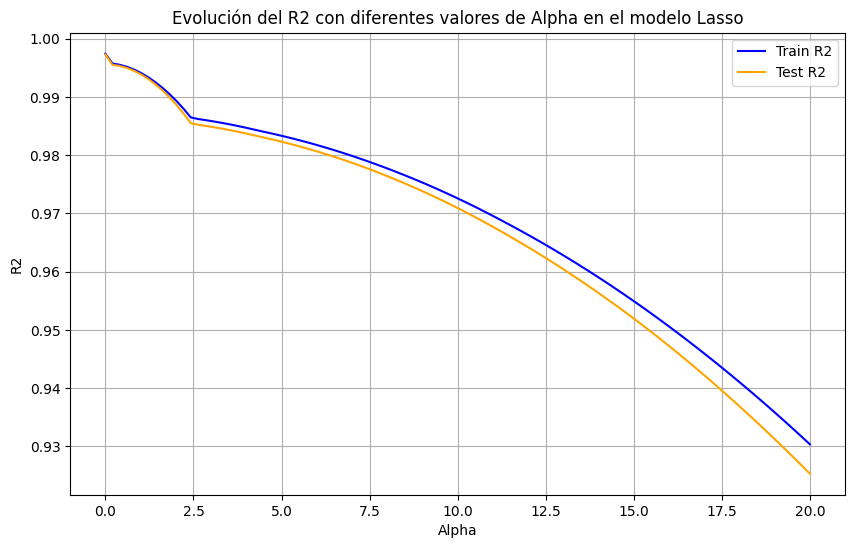

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(alphas, r2_train, label='Train R2', color='blue')
plt.plot(alphas, r2_test, label='Test R2', color='orange')
plt.xlabel('Alpha')
plt.ylabel('R2')
plt.title('Evolución del R2 para diferentes valores de Alpha en el modelo Lasso')
plt.legend()
plt.grid(True)
plt.show()

Este análisis sugiere que la regularización utilizando el método de Lasso tiene un impacto significativo en el R2 a medida que se incrementa alpha. Un valor de alpha muy bajo podría llevar a un sobreajuste (overfitting), mientras que un alpha muy alto podría causar subajuste (underfitting). Por lo tanto, es conveniente seleccionar un valor adecuado de alpha que mantenga un buen equilibrio entre el ajuste del modelo y su capacidad de generalización. En este caso, un valor de alpha entre 2.5 y 5 sería una elección óptima ya que la pendiente del R2 en ese rango es menos pronunciada.